In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw = pd.read_csv('./data/boston.csv')
raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Clustering

Let's find groups with similar tendency through clustering.

In [3]:
# Eliminate categorical data.
data = raw.drop('chas', axis = 1)
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Copy medv column for later and drop it for now.
medv = data['medv']
data.drop('medv', axis = 1, inplace = True)

In [5]:
# Before clustering, will compress the variables to 2 for better visualization and understanding.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(data)

StandardScaler()

In [8]:
scaled_data = scaler.transform(data)

In [9]:
pca = PCA(n_components = 2)

In [10]:
pca.fit(scaled_data)

PCA(n_components=2)

In [11]:
pca.transform(scaled_data)

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [12]:
pca_data = pd.DataFrame(pca.transform(scaled_data), columns = ['pc1', 'pc2'])

In [13]:
pca_data.head()

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


# Q. How many groups should I cluster?

In [14]:
from sklearn.cluster import KMeans

In [15]:
x = [ ]
y = [ ]

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(pca_data)
    
    x.append(k)
    y.append(kmeans.inertia_)

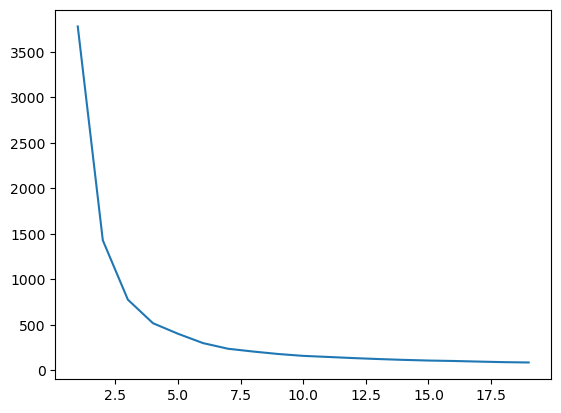

In [16]:
plt.plot(x, y)

# Set elbow point = 4, start clustering

In [19]:
kmeans = KMeans(n_clusters = 4, n_init=10)

In [20]:
kmeans.fit(pca_data)

KMeans(n_clusters=4, n_init=10)

In [21]:
pca_data['label'] = kmeans.predict(pca_data)

In [22]:
pca_data.head()

,pc1,pc2,label
0,-2.097234,-0.720179,3
1,-1.456003,-0.947694,3
2,-2.073454,-0.625336,3
3,-2.610161,-0.134044,3
4,-2.456866,-0.229919,3


<Axes: xlabel='pc1', ylabel='pc2'>

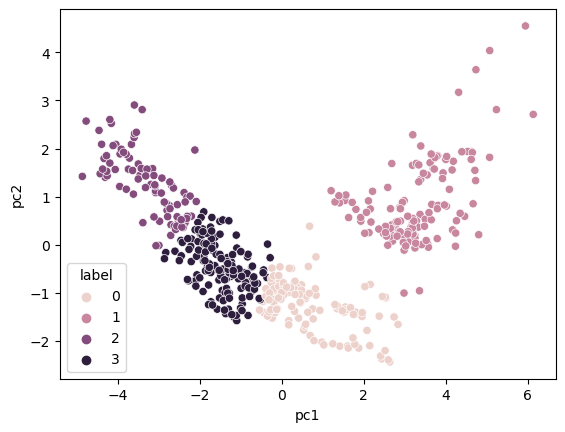

In [23]:
sns.scatterplot(data = pca_data, x = 'pc1', y = 'pc2', hue = 'label')

# Interpreting Results

In [24]:
pca_data['medv'] = medv
pca_data.head()

,pc1,pc2,label,medv
0,-2.097234,-0.720179,3,24.0
1,-1.456003,-0.947694,3,21.6
2,-2.073454,-0.625336,3,34.7
3,-2.610161,-0.134044,3,33.4
4,-2.456866,-0.229919,3,36.2


In [28]:
medv_0 = pca_data[pca_data['label'] == 0]['medv'].mean()
medv_1 = pca_data[pca_data['label'] == 1]['medv'].mean()
medv_2 = pca_data[pca_data['label'] == 2]['medv'].mean()
medv_3 = pca_data[pca_data['label'] == 3]['medv'].mean()

<Axes: >

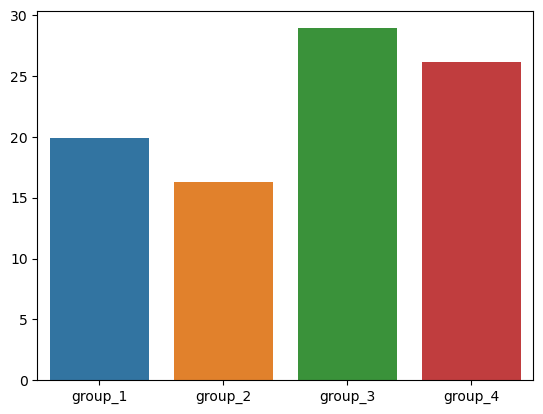

In [29]:
sns.barplot( x = ['group_1', 'group_2', 'group_3', 'group_4'], y = [medv_0, medv_1, medv_2, medv_3])

# Let's look at the characteristics of the groups

Let's look at the characteristics of the top and bottom groups to see why housing prices are high or why housing prices are low.

the top = group_3, the bottom = group_2

In [31]:
# Copy 'label' to the original df.
data['label'] = pca_data['label']

In [34]:
cond = (data['label'] == 3) | (data['label'] == 2)

In [35]:
group = data[cond]

In [37]:
group = group.groupby(by = 'label', as_index = False).mean()

In [38]:
group

,label,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,2,0.065127,54.187500,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409
1,3,0.222518,5.944785,6.481472,0.491514,6.482779,57.626994,4.40716,4.613497,281.883436,17.810429,389.696442,9.039448


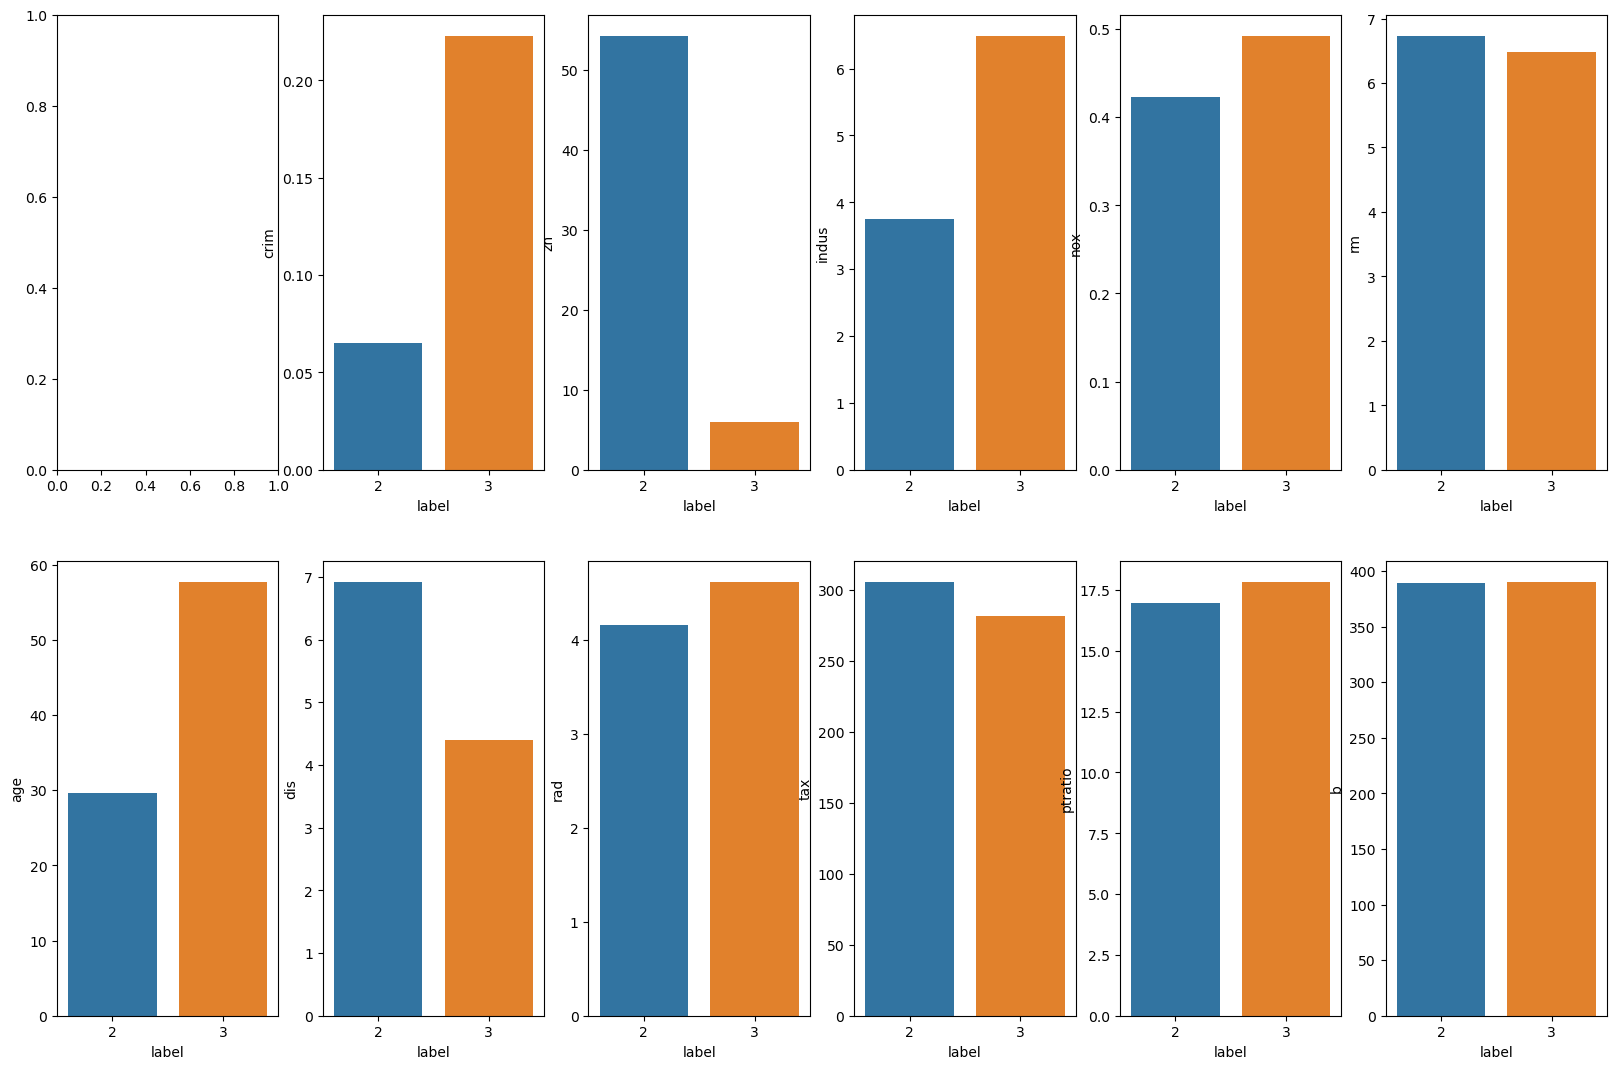

In [45]:
figure, ax = plt.subplots(2, 6, figsize = (20, 13))

for i in range(1, 12):
    sns.barplot( data = group, x = 'label', y = group.columns[i], ax = ax[ i//6, i%6])